# Linear Regression analysis for Predicting the Maintenance of Naval Vessels

![https://www.defensenews.com/resizer/X3JjzjeaJNwN0LpTeC3c7bVAsrM=/1024x0/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/archetype/ETDNHU3UKJEKLHOOJX5YH6T4FQ.jpg](https://www.defensenews.com/resizer/X3JjzjeaJNwN0LpTeC3c7bVAsrM=/1024x0/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/archetype/ETDNHU3UKJEKLHOOJX5YH6T4FQ.jpg)

# What is Predictive Maintenance?
> - **Predictive maintenance** allows the maintenance frequency to be as low as possible to prevent unplanned **reactive maintenance**, and also without doing too much **preventive maintenance**.
> - **Reactive Maintenance** is an **unplanned** maintenance and involves **restoring** equipment after it fails or breakdowns. The **cost** of reactive maintenance is **high** due to the unplanned production downtime, damaged machinery and overtime.
> - **Preventive maintenance** is maintenance that is carried out **regularly** and **routinely** to reduce the chances of equipment failure **even** when the **machine** is in **good** condition and doesn't need a repair or maintenance.
> - **Predictive maintenance** tackles both the disadvantages by **predicting** from **historical** and real-time **data** to **anticipate** problems before they happen using **Machine Learning Algorithm**.

## Agenda of this notebook
**In this notebook we will perform linear regression analysis for predicting the maintenance of Naval Vessels Condition with the help of dataset**

## 1. Importing the Necessary libraries and the dataset
 - In this section we will **import** the Naval Vessel.csv file into the workbook and look at some basic information like number of rows and columns, their datatypes, notes(if any), missing values(if any).
 - Before importing the dataset, let's **import** the **basic libraries** for machine learning like pandas, numpy, matplotlib, seaborn

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To enable matplotlib visualization
%matplotlib inline

In [19]:
# Importing the Dataset using .read_csv() function of pandas
# We will call the dataset as 'df'
df = pd.read_csv('C:\\Users\\aksha\\OneDrive\\Desktop\\PredictiveMaintainance\\data.csv')

In [20]:
# Let's check few rows of the dataset using .head() function of pandas
df.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


### The publisher of this dataset left few information regarding the dataset. I will put them here
 - The dataset contains **19 columns**.
 - Therefore there are 1 index column **16 input features** and **2 output variables** present in the dataset.

In [21]:
# We get the basic information of the dataset using .info() function of pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     11934 non-null  int64  
 1   Lever position                                            11934 non-null  float64
 2   Ship speed (v)                                            11934 non-null  int64  
 3   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 4   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 8   Hight Pressure (

**By observing the information of the dataset since all the values are in float & int datatype and there is not missing values in our dataframe so its confirmed that our dataset is clean**

In [22]:
# Using .describe() function of pandas we can able to know some basic parameters of each columns
df.describe()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5966.500000,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,3445.193391,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,0.000000,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,2983.250000,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5966.500000,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,8949.750000,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,11933.000000,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


**Since from .describe() function all the values in column ['GT Compressor inlet air temperature (T1) [C]'] & ['GT Compressor inlet air pressure (P1) [bar]'] are same we use .drop() function to drop those two columns as the output labels doesn't depend on these two input features as they remain constant**

In [23]:
# Using .value_counts() function of pandas to return a series containing counts of unique values 
df['GT Compressor inlet air temperature (T1) [C]\xa0 '].value_counts()

GT Compressor inlet air temperature (T1) [C]  
288    11934
Name: count, dtype: int64

In [24]:
# Using .drop() function of pandas to drop out the two columns and we will call the dataset as 'nv'
nv = df.drop(['GT Compressor inlet air temperature (T1) [C]\xa0 ','GT Compressor inlet air pressure (P1) [bar]\xa0 '],axis=1)

In [25]:
# Checking out the head of the dataframe with those two features removed
nv.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


## 2. Data Visualization

- In this section we will **visualize** the **data** in the form of **heatmaps**
- Here we will consider both **'GT Compressor decay state coefficient'** & **'GT Turbine decay state coefficient'** as labels and predict those using the **14 features**

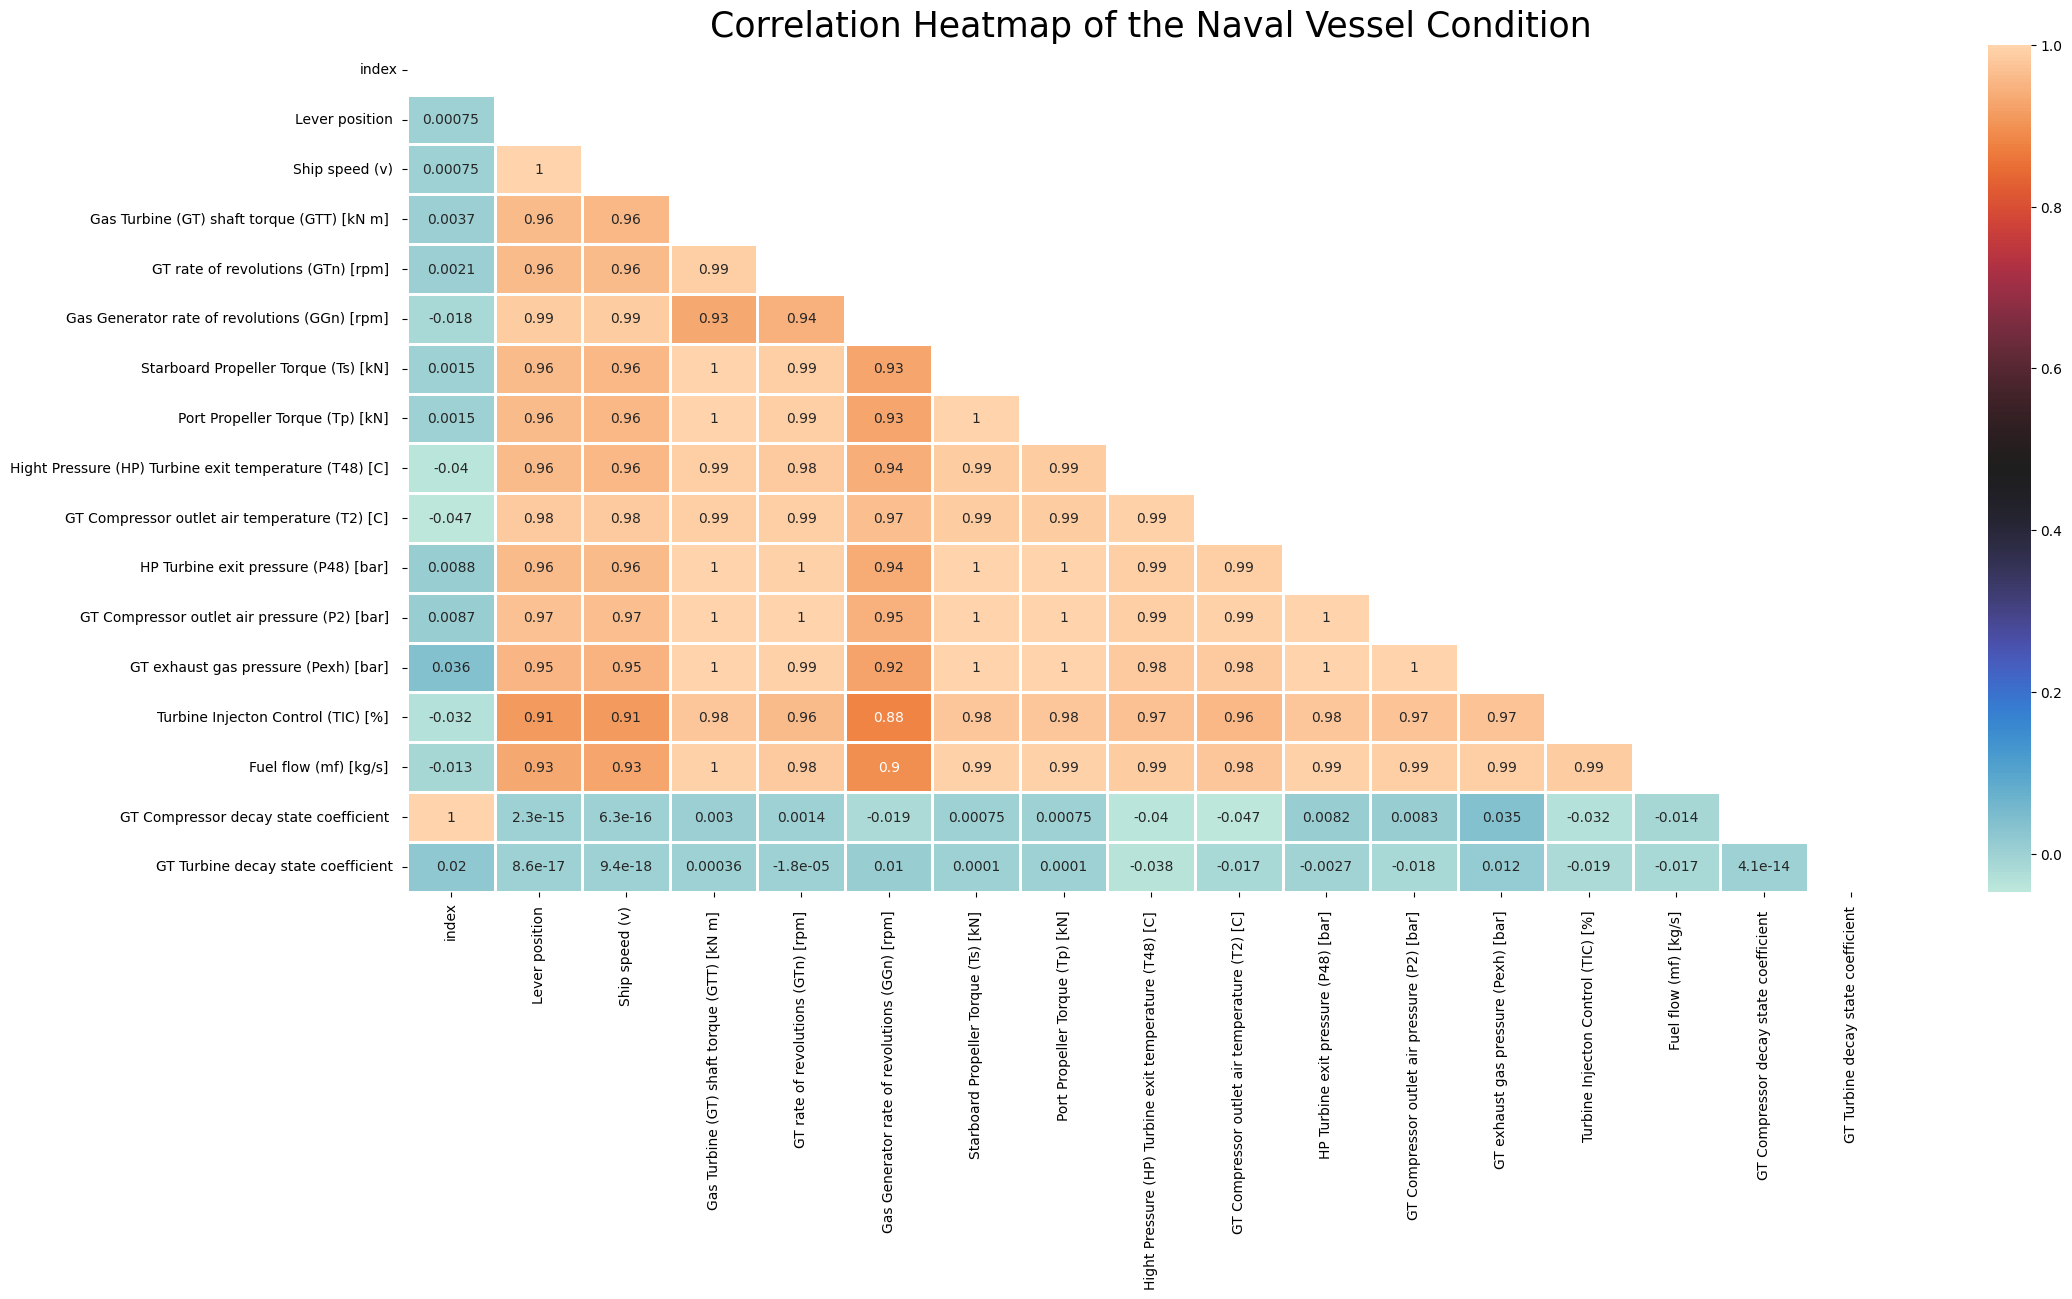

In [26]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space

fig, ax = plt.subplots(figsize = (24,11))

# Title for the heatmap
title = 'Correlation Heatmap of the Naval Vessel Condition'
plt.title(title,fontsize = 25)

# We will use the variable called mask to remove the values across the heatmap diagonally as it will be the same
mask = np.triu(np.ones_like(nv.corr()))

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(nv.corr(), cbar = True, cmap = 'icefire', annot = True, linewidth = 1, ax = ax, mask = mask)

# Enable visualization using .show() function of matplotlib
plt.show()

## Inference from heatmap

1. There exists a very **strong positive correlation** among **all** the **input** features 
2. As you can see **most** of the **input** features have a **correlation value** of **0.97** and above
3. This means that when an **input feature increases** by one unit the correlated feature **corresponding** to that **input feature also increases** by one unit
4. These input **correlations** will be useful in **finetuning** the base model in the future in the form of **interaction** terms
5. Both the **output labels** have almost **no correlation with** any of the **input** features

**Before proceeding further, to make the indexing of columns easier we have changed the names of column into simplified terms so that it can be called easily in future**

In [32]:
# Importing the New Dataset using .read_excel() function of pandas
# We will call the dataset as 'ns'
ns = pd.read_excel('C:\\Users\\aksha\\OneDrive\\Desktop\\PredictiveMaintainance\\data.xlsx')


In [33]:
# Checking out the head of the dataframe
ns.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [35]:
print(ns.columns)


Index(['index', 'Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')


In [45]:
ns.columns = ns.columns.str.replace(' ', '') 

In [53]:
ns.rename(columns=lambda x: x.strip(), inplace=True)


       index  Leverposition  Shipspeed(v)  \
0          0          1.138             3   
1          1          2.088             6   
2          2          3.144             9   
3          3          4.161            12   
4          4          5.140            15   
...      ...            ...           ...   
11929  11929          5.140            15   
11930  11930          6.175            18   
11931  11931          7.148            21   
11932  11932          8.206            24   
11933  11933          9.300            27   

       GasTurbine(GT)shafttorque(GTT)[kNm]  GTrateofrevolutions(GTn)[rpm]  \
0                                  289.964                       1349.489   
1                                 6960.180                       1376.166   
2                                 8379.229                       1386.757   
3                                14724.395                       1547.465   
4                                21636.432                       1924.313 

In [54]:
print(ns.columns)


Index(['index', 'Leverposition', 'Shipspeed(v)',
       'GasTurbine(GT)shafttorque(GTT)[kNm]', 'GTrateofrevolutions(GTn)[rpm]',
       'GasGeneratorrateofrevolutions(GGn)[rpm]',
       'StarboardPropellerTorque(Ts)[kN]', 'PortPropellerTorque(Tp)[kN]',
       'HightPressure(HP)Turbineexittemperature(T48)[C]',
       'GTCompressorinletairtemperature(T1)[C]',
       'GTCompressoroutletairtemperature(T2)[C]',
       'HPTurbineexitpressure(P48)[bar]',
       'GTCompressorinletairpressure(P1)[bar]',
       'GTCompressoroutletairpressure(P2)[bar]',
       'GTexhaustgaspressure(Pexh)[bar]', 'TurbineInjectonControl(TIC)[%]',
       'Fuelflow(mf)[kg/s]', 'GTCompressordecaystatecoefficient',
       'GTTurbinedecaystatecoefficient'],
      dtype='object')


In [56]:
# Using .drop() function of pandas to drop out the two columns as we did earlier in the dataframe 'df'
ns = ns.drop(["GTCompressorinletairpressure(P1)[bar]"], axis = 1)


In [57]:
ns.columns

Index(['index', 'Leverposition', 'Shipspeed(v)',
       'GasTurbine(GT)shafttorque(GTT)[kNm]', 'GTrateofrevolutions(GTn)[rpm]',
       'GasGeneratorrateofrevolutions(GGn)[rpm]',
       'StarboardPropellerTorque(Ts)[kN]', 'PortPropellerTorque(Tp)[kN]',
       'HightPressure(HP)Turbineexittemperature(T48)[C]',
       'GTCompressoroutletairtemperature(T2)[C]',
       'HPTurbineexitpressure(P48)[bar]',
       'GTCompressoroutletairpressure(P2)[bar]',
       'GTexhaustgaspressure(Pexh)[bar]', 'TurbineInjectonControl(TIC)[%]',
       'Fuelflow(mf)[kg/s]', 'GTCompressordecaystatecoefficient',
       'GTTurbinedecaystatecoefficient'],
      dtype='object')

## Train Test Split
Whenever we are buliding the model, we will perform **a train-test split** on the dataset. The **train data** will be used for **building the model** and the **test data** will be used to **evaluate the fit** or **accuracy** of the model.

![train-test-evaluation](https://miro.medium.com/max/1400/1*Hs7RCpyvj4NrjANdwiFHaQ@2x.jpeg)

Therefore out of **11934** values in our **dataset** we take **20%** of it to the **testing set** and remaining to the **training the model**

## Model 1 : Predicting GT Compressor decay state coefficient based on 14 features.

- Here we will be building multiple linear regression model to predict GT Compressor decay state coefficient based on all 14 features from lever position to fuel flow

In [58]:
# Defining features and labels
X = ns.drop(['GTCompressordecaystatecoefficient','GTTurbinedecaystatecoefficient','index'],axis=1)

y = ns['GTCompressordecaystatecoefficient']

In [59]:
# Importing train test split from scikit learn library
from sklearn.model_selection import train_test_split

In [60]:
# Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [61]:
# Importing LinearRegression model from scikit learn library
from sklearn.linear_model import LinearRegression

In [62]:
# Creating an instance of a LinearRegression() model named lm
lm = LinearRegression()

In [63]:
# Fitting the lm model with training set
lm.fit(X_train,y_train)

LinearRegression()

In [88]:
# Predicting the y values by using the .predict() function
pred = lm.predict(X_test)

In [90]:
pred

array([0.97115105, 0.99006955, 0.95386963, ..., 0.98507246, 0.9742216 ,
       0.98609121])

In [91]:
len(pred)

2387

In [65]:
# Printing out the coefficients of the model
print('Coeffiecients: \n',lm.coef_)

Coeffiecients: 
 [ 2.60014335e-01 -7.62369632e-02 -3.19526121e-07 -2.92740638e-05
  3.13801818e-05 -5.61710613e-04 -5.61710612e-04 -5.05978578e-06
 -3.39085210e-03  1.84406031e-01  1.41633312e-02  7.84900768e-01
 -7.25691673e-04  2.22244383e-01]


In [66]:
# Recerating the coefficients of the model as dataframe
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Leverposition,2.600143e-01
Shipspeed(v),-7.623696e-02
GasTurbine(GT)shafttorque(GTT)[kNm],-3.195261e-07
GTrateofrevolutions(GTn)[rpm],-2.927406e-05
GasGeneratorrateofrevolutions(GGn)[rpm],3.138018e-05
StarboardPropellerTorque(Ts)[kN],-5.617106e-04
PortPropellerTorque(Tp)[kN],-5.617106e-04
HightPressure(HP)Turbineexittemperature(T48)[C],-5.059786e-06
GTCompressoroutletairtemperature(T2)[C],-3.390852e-03
HPTurbineexitpressure(P48)[bar],1.844060e-01


In [67]:
# Checking the RMSE and r2_score value between y_test and predicted y_test values
from sklearn import metrics

In [68]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 score:', metrics.r2_score(y_test, pred))

RMSE: 0.005777053365878182
R2 score: 0.8454340416553053


Text(0, 0.5, 'Predicted Y')

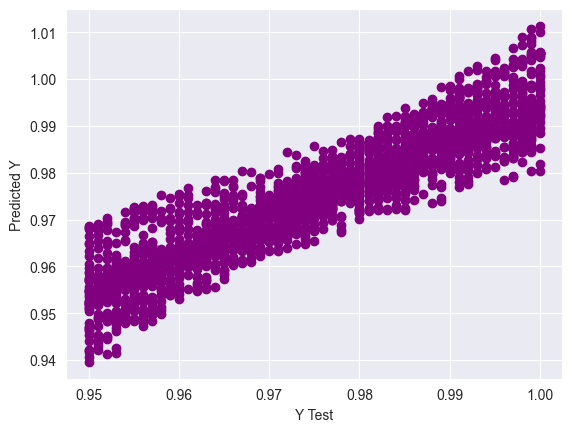

In [70]:
# Creatinng a scatterplot of the y_test values vs the predicted y_test values
sns.set_style('darkgrid')
plt.scatter(y_test,pred,c='purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [72]:
# Importing the statsmodels library
import statsmodels.api as sm

In [73]:
# Let's define a function for the multiple regression
def linear_Regression(x,y):
    
    x = sm.add_constant(x)
    
    # defining the model, fitting the model and printing the model summary
    sm_model = sm.OLS(y,x).fit()
    print(sm_model.summary())

In [92]:
# Calling the linear regression function
linear_Regression(X,y)

                                    OLS Regression Results                                   
Dep. Variable:     GTCompressordecaystatecoefficient   R-squared:                       0.843
Model:                                           OLS   Adj. R-squared:                  0.843
Method:                                Least Squares   F-statistic:                     5818.
Date:                               Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                                       16:23:28   Log-Likelihood:                 44458.
No. Observations:                              11934   AIC:                        -8.889e+04
Df Residuals:                                  11922   BIC:                        -8.880e+04
Df Model:                                         11                                         
Covariance Type:                           nonrobust                                         
                                              coef    std er

## Inference from Model 1

1. The **R-squared** value is **0.843** which states that about **84.3%** of proportion of **variability** in data can be explained by this **linear regression model**. The **R-squared** is the most **important parameter** for a **model evaluation**. Higher the value, better is the fit. 
2. The **p-value** is the most **important measure** for evaluating the various **variables**. Closer is the **p-value to 1**, the **lesser** is that **feature variable** has to do with the **label variable**.In our model, **Hight Pressure (HP) Turbine exit temperature, Gas Turbine shaft torque (GTT)** are all close to **1** meaning they **don't** play **much role** in predicting the GT Compressor decay state coefficient.
3. Finally, the **expression** for this model can be written from the **coefficients** as follows

**GT Compressor decay state coefficient = 0.9771 - 0.0024 * Lever position - 0.0766 * Ship speed - 5.185e-07 * GTT -2.982e-05 * GTn + 3.085e-05 * GGn - 0.0006 * Ts - 0.0006 * Tp + 5.588e-06 * HP - 0.0034 * T2 + 0.1901 * P48 + 0.0138 * P2 + 0.7473 * Pexh - 0.0007 * TIC + 0.2179 * mf**

### Now let's eliminate Hight Pressure (HP) Turbine exit temperature, Gas Turbine shaft torque (GTT) and build the model to see if there's any improvement.

In [75]:
# Check X
X.head()

,Leverposition,Shipspeed(v),GasTurbine(GT)shafttorque(GTT)[kNm],GTrateofrevolutions(GTn)[rpm],GasGeneratorrateofrevolutions(GGn)[rpm],StarboardPropellerTorque(Ts)[kN],PortPropellerTorque(Tp)[kN],HightPressure(HP)Turbineexittemperature(T48)[C],GTCompressoroutletairtemperature(T2)[C],HPTurbineexitpressure(P48)[bar],GTCompressoroutletairpressure(P2)[bar],GTexhaustgaspressure(Pexh)[bar],TurbineInjectonControl(TIC)[%],Fuelflow(mf)[kg/s]
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522


In [78]:
X.columns

Index(['Leverposition', 'Shipspeed(v)', 'GasTurbine(GT)shafttorque(GTT)[kNm]',
       'GTrateofrevolutions(GTn)[rpm]',
       'GasGeneratorrateofrevolutions(GGn)[rpm]',
       'StarboardPropellerTorque(Ts)[kN]', 'PortPropellerTorque(Tp)[kN]',
       'HightPressure(HP)Turbineexittemperature(T48)[C]',
       'GTCompressoroutletairtemperature(T2)[C]',
       'HPTurbineexitpressure(P48)[bar]',
       'GTCompressoroutletairpressure(P2)[bar]',
       'GTexhaustgaspressure(Pexh)[bar]', 'TurbineInjectonControl(TIC)[%]',
       'Fuelflow(mf)[kg/s]'],
      dtype='object')

In [79]:
X = X.drop(['GasTurbine(GT)shafttorque(GTT)[kNm]','HightPressure(HP)Turbineexittemperature(T48)[C]'], axis = 1)

In [80]:
# Calling the linear_Regression function
linear_Regression(X,y)

                                    OLS Regression Results                                   
Dep. Variable:     GTCompressordecaystatecoefficient   R-squared:                       0.843
Model:                                           OLS   Adj. R-squared:                  0.843
Method:                                Least Squares   F-statistic:                     5818.
Date:                               Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                                       15:59:26   Log-Likelihood:                 44458.
No. Observations:                              11934   AIC:                        -8.889e+04
Df Residuals:                                  11922   BIC:                        -8.880e+04
Df Model:                                         11                                         
Covariance Type:                           nonrobust                                         
                                              coef    std er

## Inference

1. The **R-squared value** remains same as **84.3%**.
2. The **p-values** of all the **considered features** do play an **important role** in predicting the label.
3. We can **improve** the **model** further by considering **interaction terms** based on the **correlation heatmap**.
4. The various interaction terms are as follows
- Ship speed and Lever position
- Port propellar torque and Standard propellar torque
- Turbine exit pressure and GT rate of revolutions
- Turbine exit pressure and Standard propellar torque
- Turbine exit pressure and Port propellar torque
- Compressor outlet air pressure and Standard propellar torque
- Compressor outlet air pressure and Port propellar torque
- Compressor outlet air pressure and GT rate of revolutions
- Compressor outlet air pressure and Turbine exit pressure
- GT exhaust gas pressure and Standard propellar torque
- GT exhaust gas pressure and Port propellar torque
- GT exhaust gas pressure and Compressor outlet air pressure
- GT exhaust gas pressure and Turbine exit pressure

In [83]:
X.columns

Index(['Leverposition', 'Shipspeed(v)', 'GTrateofrevolutions(GTn)[rpm]',
       'GasGeneratorrateofrevolutions(GGn)[rpm]',
       'StarboardPropellerTorque(Ts)[kN]', 'PortPropellerTorque(Tp)[kN]',
       'GTCompressoroutletairtemperature(T2)[C]',
       'HPTurbineexitpressure(P48)[bar]',
       'GTCompressoroutletairpressure(P2)[bar]',
       'GTexhaustgaspressure(Pexh)[bar]', 'TurbineInjectonControl(TIC)[%]',
       'Fuelflow(mf)[kg/s]'],
      dtype='object')

In [81]:
# Check X
X.head()

,Leverposition,Shipspeed(v),GTrateofrevolutions(GTn)[rpm],GasGeneratorrateofrevolutions(GGn)[rpm],StarboardPropellerTorque(Ts)[kN],PortPropellerTorque(Tp)[kN],GTCompressoroutletairtemperature(T2)[C],HPTurbineexitpressure(P48)[bar],GTCompressoroutletairpressure(P2)[bar],GTexhaustgaspressure(Pexh)[bar],TurbineInjectonControl(TIC)[%],Fuelflow(mf)[kg/s]
0,1.138,3,1349.489,6677.380,7.584,7.584,550.563,1.096,5.947,1.019,7.137,0.082
1,2.088,6,1376.166,6828.469,28.204,28.204,581.658,1.331,7.282,1.019,10.655,0.287
2,3.144,9,1386.757,7111.811,60.358,60.358,587.587,1.389,7.574,1.020,13.086,0.259
3,4.161,12,1547.465,7792.630,113.774,113.774,613.851,1.658,9.007,1.022,18.109,0.358
4,5.140,15,1924.313,8494.777,175.306,175.306,645.642,2.078,11.197,1.026,26.373,0.522


In [84]:
# Get the interaction terms by multiplying values
aa = X['Shipspeed(v)']*X['Leverposition']
bb = X['PortPropellerTorque(Tp)[kN]']*X['StarboardPropellerTorque(Ts)[kN]']
cc = X['HPTurbineexitpressure(P48)[bar]']*X['GTrateofrevolutions(GTn)[rpm]']
dd = X['HPTurbineexitpressure(P48)[bar]']*X['StarboardPropellerTorque(Ts)[kN]']
ee = X['HPTurbineexitpressure(P48)[bar]']*X['PortPropellerTorque(Tp)[kN]']
ff = X['GTCompressoroutletairpressure(P2)[bar]']*X['StarboardPropellerTorque(Ts)[kN]']
gg = X['GTCompressoroutletairpressure(P2)[bar]']*X['PortPropellerTorque(Tp)[kN]']
hh = X['GTCompressoroutletairpressure(P2)[bar]']*X['GTrateofrevolutions(GTn)[rpm]']
ii = X['GTCompressoroutletairpressure(P2)[bar]']*X['HPTurbineexitpressure(P48)[bar]']
jj = X['GTexhaustgaspressure(Pexh)[bar]']*X['PortPropellerTorque(Tp)[kN]']
kk = X['GTexhaustgaspressure(Pexh)[bar]']*X['StarboardPropellerTorque(Ts)[kN]']
ll = X['GTexhaustgaspressure(Pexh)[bar]']*X['HPTurbineexitpressure(P48)[bar]']
mm = X['GTexhaustgaspressure(Pexh)[bar]']*X['GTCompressoroutletairpressure(P2)[bar]']

In [85]:
# Adding these interactions terms to dataset using .concat() function of pandas
# We will call this dataset as interaction

interaction = pd.concat([X,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,ll,mm,kk],axis=1)

# Change column names of this interaction terms
interaction = interaction.rename(columns = {0:'aa',1:'bb',2:'cc',3:'dd',4:'ee',5:'ff',6:'gg',7:'hh',8:'ii',9:'jj',
                                            10:'ll',11:'mm',12:'kk'})

interaction.head()

,Leverposition,Shipspeed(v),GTrateofrevolutions(GTn)[rpm],GasGeneratorrateofrevolutions(GGn)[rpm],StarboardPropellerTorque(Ts)[kN],PortPropellerTorque(Tp)[kN],GTCompressoroutletairtemperature(T2)[C],HPTurbineexitpressure(P48)[bar],GTCompressoroutletairpressure(P2)[bar],GTexhaustgaspressure(Pexh)[bar],...,dd,ee,ff,gg,hh,ii,jj,ll,mm,kk
0,1.138,3,1349.489,6677.380,7.584,7.584,550.563,1.096,5.947,1.019,...,8.312064,8.312064,45.102048,45.102048,8025.411083,6.517912,7.728096,1.116824,6.059993,7.728096
1,2.088,6,1376.166,6828.469,28.204,28.204,581.658,1.331,7.282,1.019,...,37.539524,37.539524,205.381528,205.381528,10021.240812,9.692342,28.739876,1.356289,7.420358,28.739876
2,3.144,9,1386.757,7111.811,60.358,60.358,587.587,1.389,7.574,1.020,...,83.837262,83.837262,457.151492,457.151492,10503.297518,10.520286,61.565160,1.416780,7.725480,61.565160
3,4.161,12,1547.465,7792.630,113.774,113.774,613.851,1.658,9.007,1.022,...,188.637292,188.637292,1024.762418,1024.762418,13938.017255,14.933606,116.277028,1.694476,9.205154,116.277028
4,5.140,15,1924.313,8494.777,175.306,175.306,645.642,2.078,11.197,1.026,...,364.285868,364.285868,1962.901282,1962.901282,21546.532661,23.267366,179.863956,2.132028,11.488122,179.863956


In [86]:
# Now let's fit this model to the Linear regression function

linear_Regression(interaction,y)

                                    OLS Regression Results                                   
Dep. Variable:     GTCompressordecaystatecoefficient   R-squared:                       0.935
Model:                                           OLS   Adj. R-squared:                  0.934
Method:                                Least Squares   F-statistic:                     8108.
Date:                               Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                                       16:03:45   Log-Likelihood:                 49686.
No. Observations:                              11934   AIC:                        -9.933e+04
Df Residuals:                                  11912   BIC:                        -9.916e+04
Df Model:                                         21                                         
Covariance Type:                           nonrobust                                         
                                              coef    std er

## Model 1 Summary

- Alright now, we have an increased R-squared of 93.5% or 0.935 which is very high.
- We will stop here and declare this model as the most suitable for predicting GT Compressor decay state coefficient.

## Model 2: Predicting GT Turbine decay state coefficient based on 14 features

- Here we will be building multiple linear regression model to predict GT Turbine decay state coefficient based on all 14 features from lever position to fuel flow.

In [36]:
# Defining features and labels
X = ns.drop(['Compressor DSC','Turbine DSC','index'],axis=1)

y = ns['Turbine DSC']

In [37]:
# Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
# Importing LinearRegression model from scikit learn library
from sklearn.linear_model import LinearRegression

In [39]:
# Creating an instance of a LinearRegression() model named lt
lt = LinearRegression()

In [40]:
# Fitting the lt model with training set
lt.fit(X_train,y_train)

LinearRegression()

In [41]:
# Predicting the y values by using the .predict() function
preds = lt.predict(X_test)

In [ ]:
.

In [42]:
# Printing out the coefficients of the model
print('Coeffiecients: \n',lt.coef_)

Coeffiecients: 
 [ 1.72268258e-03  5.67040755e-03  1.38385369e-05  6.57639992e-05
  3.15645427e-05 -7.94102217e-04 -7.94102217e-04 -6.84367116e-04
  1.79966197e-04  8.21372324e-02 -5.38343448e-02  8.96222991e-01
 -2.41529627e-04  3.60687263e-01]


In [43]:
# Recerating the coefficients of the model as dataframe
coeffecients = pd.DataFrame(lt.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Lever position,0.001723
Ship speed (v),0.005670
GTT,0.000014
GTn,0.000066
GGn,0.000032
Ts,-0.000794
Tp,-0.000794
HP,-0.000684
T2,0.000180
P48,0.082137


In [44]:
# Checking the RMSE and r2_score value between y_test and predicted y_test values
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 score:', metrics.r2_score(y_test, preds))

RMSE: 0.002263609402560576
R2 score: 0.9086685819641146


Text(0, 0.5, 'Predicted Y')

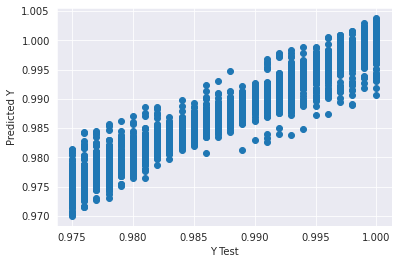

In [45]:
# Creatinng a scatterplot of the y_test values vs the predicted y_test values
sns.set_style('darkgrid')
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
# Calling the linear regression function and print the model summary
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:            Turbine DSC   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     9385.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:29:18   Log-Likelihood:                 55892.
No. Observations:               11934   AIC:                        -1.118e+05
Df Residuals:                   11920   BIC:                        -1.117e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1430      0.072      1.

## Inference from Model 2

1. The **R-squared** value is **0.911** which states that about **91.1%** of proportion of **variability** in data can be explained by this **linear regression model**. The **R-squared** is the most **important parameter** for a **model evaluation**. Higher the value, better is the fit. 
2. The **p-value** is the most **important measure** for evaluating the various **variables**. Closer is the **p-value to 1**, the **lesser** is that **feature variable** has to do with the **label variable**.In our model, all the considered features **do** play an **important role** in predicting the label.
3. Finally, the **expression** for this model can be written from the **coefficients** as follows

**GT Turbine decay state coefficient = 0.1430 + 0.0012 * Lever position + 0.0058 * Ship speed + 1.381e-05 * GTT + 6.543e-05 * GTn + 3.148e-05 * GGn - 0.0008 * Ts - 0.0008 * Tp + 0.0007 * HP + 0.0002 * T2 + 0.0817 * P48 - 0.0538 * P2 + 0.9313 * Pexh - 0.0002 * TIC + 0.3589 * mf**

## Model 2 Summary

- Alright now, we have an R-squared of 91.1% or 0.911 which is very high.
- Hence, we will stop here and declare this model as the most suitable for predicting GT Turbine decay state coefficient.

# Overall Summary

1. In this notebook, we have studied the relationship between the 14 features and the 2 labels.
2. The GT Turbine decay state coefficient behaves perfectly with the 14 features considered whereas the GT Compressor decay state coefficient behaves linearly with only 12 features as the remaining 2 features were irrelevant in predicting the coeffecient.
3. During Model 1, initially the R-squared value was just 84.3% and the model is further improved by considering interaction terms based on the correlation heatmap after which the R-squared value has been increased to 93.5% and thus declaring the model as the most suitable for predicting GT Compressor decay state coefficient.
3. So, this is how you perform a Linear regression study on a given dataset.

### If you like the work, consider leaving an upvote.

## THANKS!!!

In [87]:
preds

NameError: name 'preds' is not defined